In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
import seaborn as sns

In [2]:
X, y = make_circles(n_samples=100, noise=0.1, random_state=1)

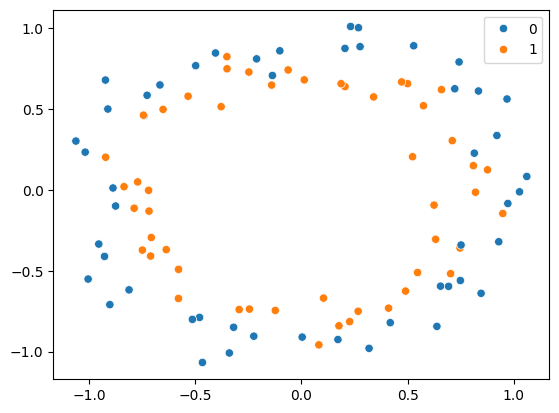

In [6]:
sns.scatterplot(data = pd.DataFrame(X), x = X[:,0], y = X[:,1], hue=y)
plt.show()

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2)

In [8]:
model = Sequential()

model.add(Dense(256, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [10]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3500, verbose=0)

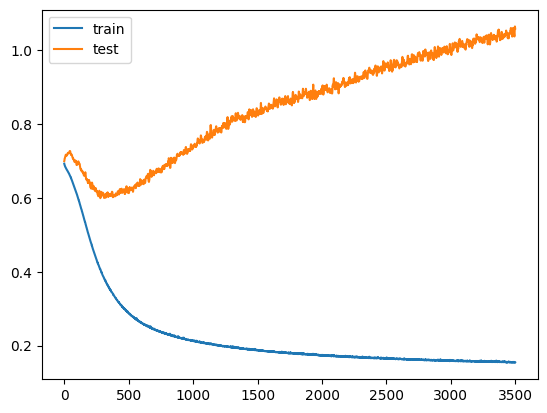

In [11]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step


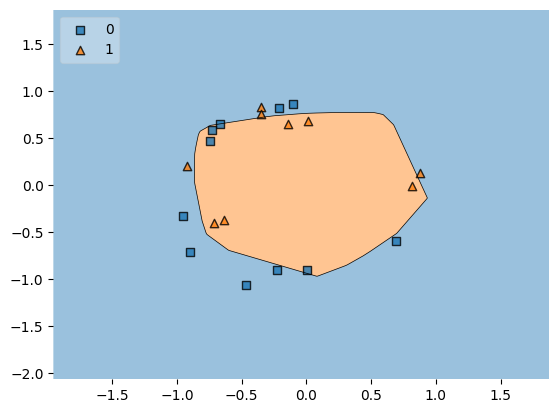

In [12]:
plot_decision_regions(X_test, y_test.ravel(), clf = model, legend=2)
plt.show()

# Early Stopping

In [13]:
model = Sequential()

model.add(Dense(256, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [14]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [15]:
callback = EarlyStopping(
    monitor="val_loss", # Kiske uper monitor krna chahate ho
    min_delta=0.00001, # If val_loss(monitor) is more than the specified value then there is an improvement
    patience=20, # No. of epochs after no improvements
    verbose=1,
    mode="auto", # 'max' - Stop increasing | 'min' - Stop decreasing monitored value | "auto" - autometic(recommended)
    baseline=None, # baseline number - only provide when you have value knowledge about your data
    restore_best_weights=False # The weights at which lowest loss value till early stopping
)

In [16]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3500, callbacks=callback)

Epoch 1/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 331ms/step - accuracy: 0.4656 - loss: 0.6942 - val_accuracy: 0.6000 - val_loss: 0.6884
Epoch 2/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.4453 - loss: 0.6929 - val_accuracy: 0.6500 - val_loss: 0.6917
Epoch 3/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5555 - loss: 0.6900 - val_accuracy: 0.5500 - val_loss: 0.6944
Epoch 4/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5109 - loss: 0.6906 - val_accuracy: 0.4000 - val_loss: 0.6975
Epoch 5/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.5484 - loss: 0.6870 - val_accuracy: 0.4000 - val_loss: 0.6998
Epoch 6/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5352 - loss: 0.6874 - val_accuracy: 0.4000 - val_loss: 0.7021
Epoch 7/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5883 - loss: 0.6862 - val_accuracy: 0.4000 - val_loss: 0.7043
Epoch 8/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5664 - loss: 0.6838 - val_accuracy: 0.4000 - 

Early Stopped in 21 epochs

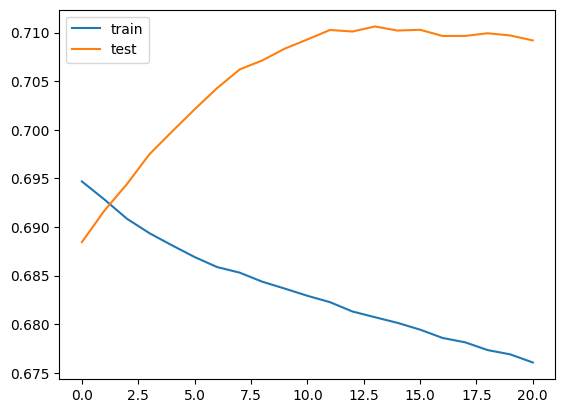

In [17]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step


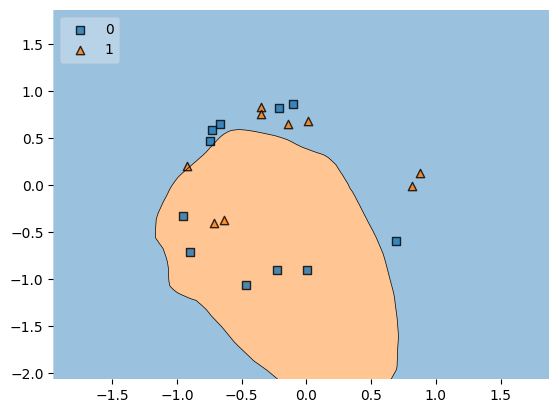

In [18]:
plot_decision_regions(X_test, y_test.ravel(), clf = model, legend=2)
plt.show()